In [1]:
import pandas as pd
import pandas as pd

In [2]:
매출 = pd.read_excel('./data/profit.xlsx')
# 월을 인덱스로 설정
매출 = 매출.set_index('월')

In [3]:
# 노트북 내 그래프 출력 설정
%matplotlib inline

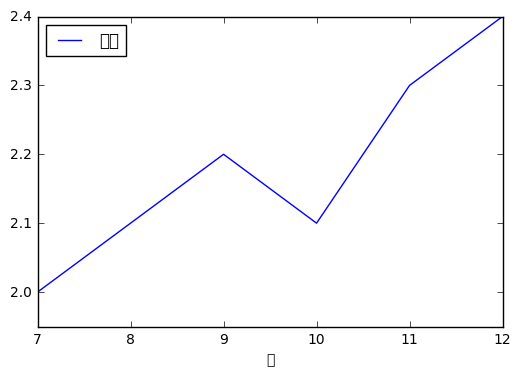

In [4]:
# 그래프 출력
매출.plot()

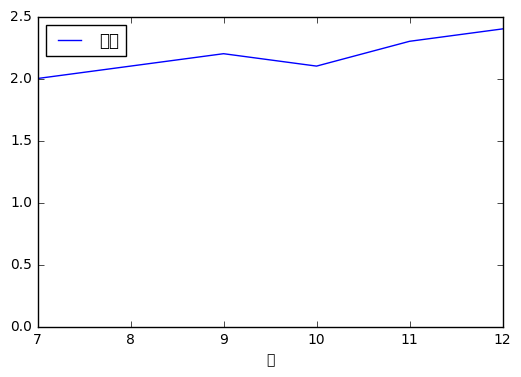

In [5]:
# y축 구간을 다르게 설정
매출.plot(ylim=(0.0, 2.5))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc3ceb82668>], dtype=object)

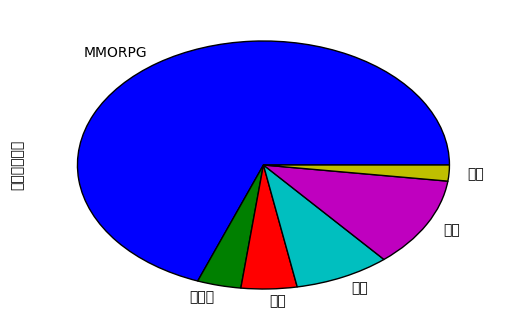

In [8]:
# 다른데이터 로딩
게임사용자 = pd.read_excel('./data/game_users.xlsx')
게임사용자 = 게임사용자.set_index('장르')

# 파라미터에 kind=그래프명을 넣으므로써 그래프 유형을 변경할 수 있음
게임사용자['누적사용자수'].plot(kind='pie', subplots=True)

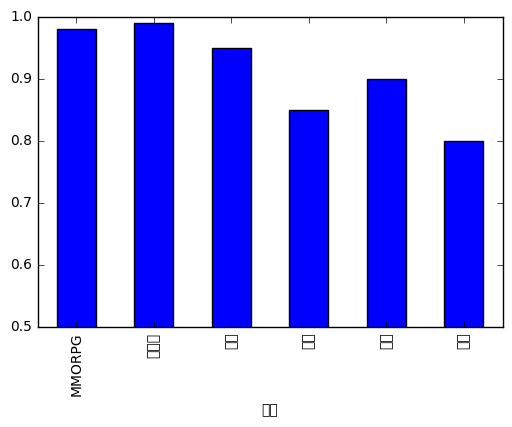

In [9]:
# 만족도는 막대 그래프로 출력
게임사용자['만족도'].plot(kind='bar', ylim=(0.5, 1.0))

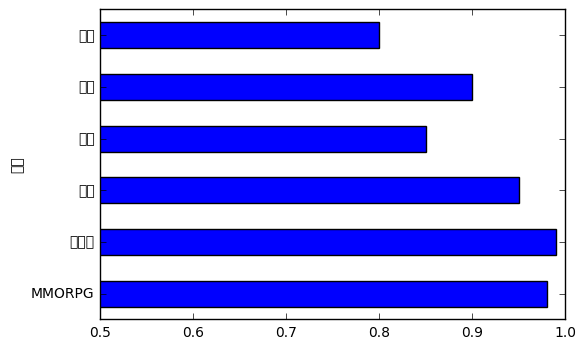

In [10]:
# 가로로 출력
게임사용자['만족도'].plot(kind='barh', xlim=(0.5, 1.0))

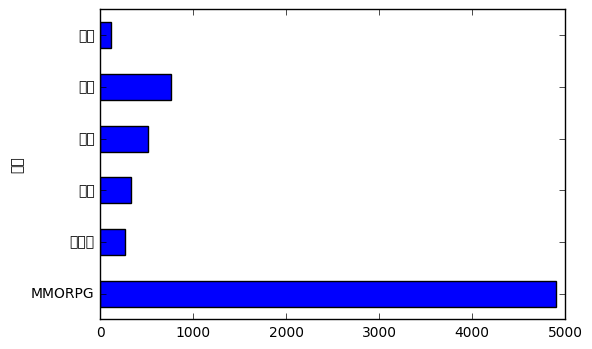

In [11]:
# 도수
# 만족도가 높다고 무조건 더 잘한 것 일까요?
만족도수 = 게임사용자['누적사용자수'] * 게임사용자['만족도']
만족도수.plot(kind='barh')

In [13]:
# 도수와 평균
평점 = pd.read_excel('./data/ratings.xlsx')
평점[:5]

,평점
0,80.883396
1,36.953374
2,60.841683
3,72.278554
4,48.887120


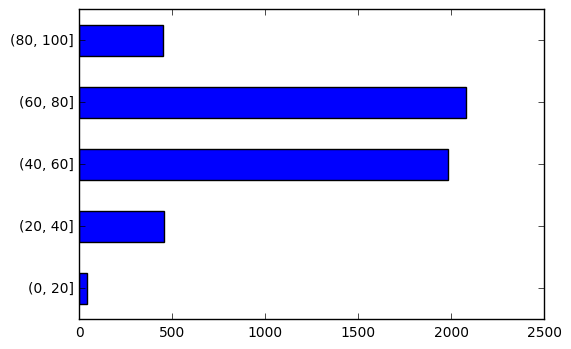

In [14]:
# 점수를 구간대 별로 나누어야 도수를 측정할 수 있습니다.
# 20단위로 구간을 나누기 위해 구간 경계를 설정합니다.
구간경계 = [0, 20, 40, 60, 80, 100]
평점분류 = pd.cut(평점['평점'], 구간경계)
평점도수 = 평점분류.value_counts().sort_index()
평점도수.plot(kind='barh')

In [16]:
# 연령대 별 사용자 수
연령 = pd.read_excel('./data/ages.xlsx')
(연령.min(), 연령.max(), len(연령))

(연령    15
 dtype: int64, 연령    70
 dtype: int64, 5000)

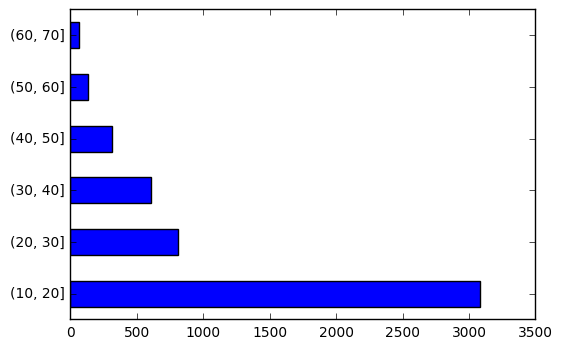

In [17]:
연령경계 = range(10, 80, 10)
연령경계 = list(연령경계)
연령분류 = pd.cut(연령['연령'], 연령경계)
연령도수 = 연령분류.value_counts().sort_index()
연령도수.plot(kind='barh')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc3ce768320>]], dtype=object)

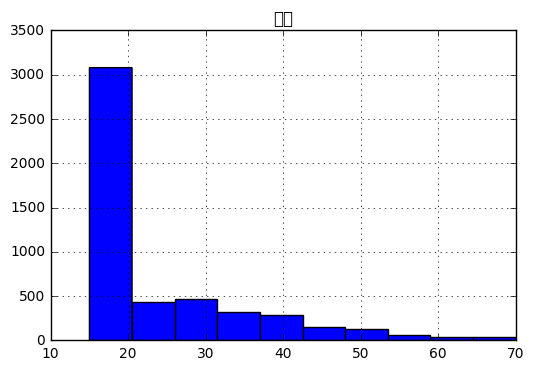

In [18]:
# 도수분포표, 또는 히스토그램은 워낙 잘 사용하는 기능이라 전용으로 준비되어 있음
연령.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc3ce69c710>]], dtype=object)

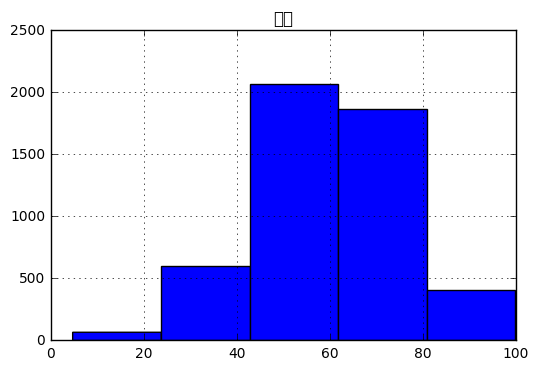

In [19]:
평점.hist(bins=5) # 도수 개수, 바구니 수

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc3ce5ea978>]], dtype=object)

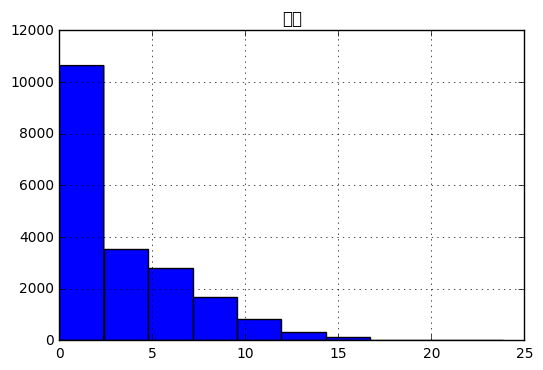

In [22]:
# 도수분포와 누적도수
게임시간 = pd.read_excel('./data/playtime.xlsx')
# 사용자의 게임시간은 게임의 몰입도에 대한 간접적인 지표가 될 수 있을 것 같습니다. 또한, 게임의 몰입도는 잠재적으로 매출로 연결된 개연성을 가정할 수 있을 것 같습니다.
게임시간.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc3ce96f9e8>]], dtype=object)

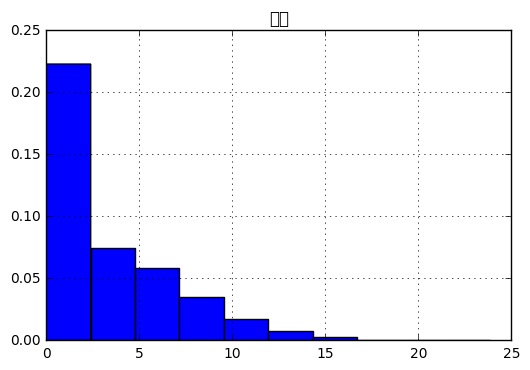

In [23]:
# 정규화 = 비율로 출력
게임시간.hist(normed=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc3ce7d6400>]], dtype=object)

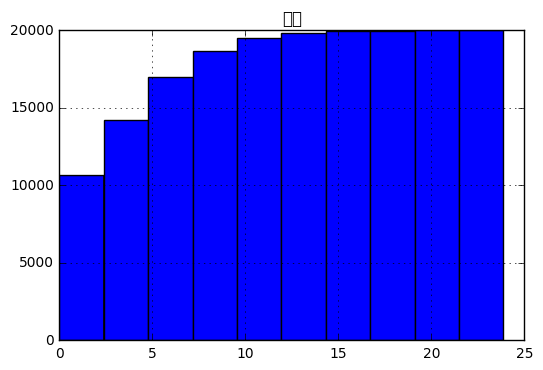

In [24]:
# 누적도수
게임시간.hist(cumulative=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc3ce3e7208>]], dtype=object)

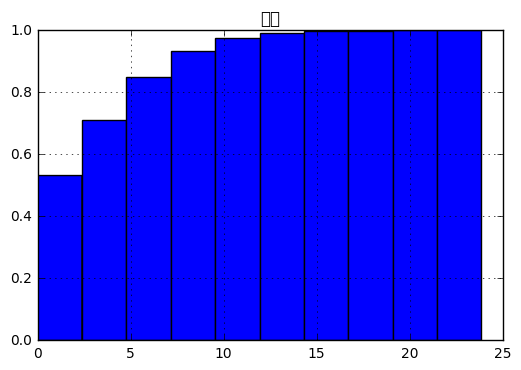

In [25]:
# 누적도수 + 정규화
게임시간.hist(cumulative=True, normed=True)

In [26]:
# 중심적 경향의 특성
# "평균"도 여러가지 방식이 있습니다.
# 산술평균
# 중앙값 : 전체를 반으로 나누는 기준 값
# 최빈값 : 가장 빈번히 발생한 값

#사용자의 연령대를 살펴보고, 행사에 초청할 연예인을 섭외하려고 합니다. 어떤 연령대에 맞쳐야 할 까요?

# 중앙 값을 살펴보니 평균값과 상당한 차이가 있습니다.

# 45세 미만 연령대에서만 평균을 구해보겠습니다.
(연령.mean(), 연령.median(), 연령[연령 < 45].mean())

(연령    22.9032
 dtype: float64, 연령    15.0
 dtype: float64, 연령    20.625457
 dtype: float64)

In [29]:
# 최빈값
수영강습생 = pd.read_excel('./data/swim_class.xlsx')
수영강습생평균 = 수영강습생.mean()
수영강습생중앙값 = 수영강습생.median() # 결과 둘 다 17
(수영강습생평균, 수영강습생중앙값)

(나이    17.0
 dtype: float64, 나이    17.0
 dtype: float64)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc3ce52c898>]], dtype=object)

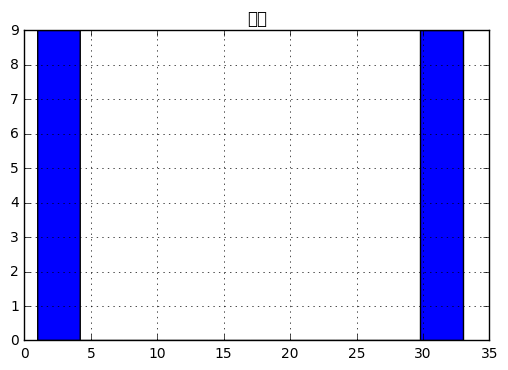

In [30]:
# 10대는 없는듯
수영강습생.hist() # 0~5, 30~35 만 많음

In [31]:
# 최빈값 확인 - 아마 초보 엄마들이 아가들을 데리고 오는 수영강습인듯
수영강습생.mode()

,나이,성별
0,2,여자
1,32,NaN


In [33]:
# 평균 연봉과 연봉인상
연봉 = pd.read_excel('./data/salary.xlsx')
(연봉.mean(), 연봉.median(), 연봉.min(), 연봉.max())

(연봉    5513.759071
 dtype: float64, 연봉    3585.611774
 dtype: float64, 연봉    1500.0
 dtype: float64, 연봉    54640.206133
 dtype: float64)

In [34]:
인상안1 = 연봉 * 1.15
인상안2 = 연봉 + 1000
(인상안1.mean(), 인상안2.mean(), 인상안1.median(), 인상안2.median())

(연봉    6340.822932
 dtype: float64, 연봉    6513.759071
 dtype: float64, 연봉    4123.453541
 dtype: float64, 연봉    4585.611774
 dtype: float64)

In [35]:
연봉.mode()

,연봉
0,1500.0


In [36]:
인상안1.mode()

,연봉
0,1725.0


In [37]:
인상안2.mode()

,연봉
0,2500.0


In [39]:
# 변이와 분포
게임당점수 = pd.read_excel('./data/player_stats.xlsx')
게임당점수[:5]

,이성주,김성주,장성주
0,7.0,7.0,3
1,8.0,9.0,3
2,9.0,9.0,6
3,9.0,10.0,7
4,10.0,10.0,7


In [40]:
(게임당점수.mean(), 게임당점수.median())

(이성주    10.0
 김성주    10.0
 장성주    10.0
 dtype: float64, 이성주    10.0
 김성주    10.0
 장성주    10.0
 dtype: float64)

In [41]:
# 세명의 선수가 같은 프로게임팀에 속했다고 하겠습니다. 현재 팀 위기에 쳐했는데 어떤 선수를 기용해얗 할까요
# 범위 측정
범위구하기 = lambda x : x.max() - x.min()
게임당점수.apply(범위구하기)

이성주     6.0
김성주     6.0
장성주    27.0
dtype: float64

In [44]:
# 이상치가 포함되면 무엇은 제회해야 할 까요? 어디까지 이상치로 봐야 할까요?
# 사분범위
# 전체를 균등하게 4등분해서 중앙의 두개만 취해 앞뒤 이상치를 제외하는 표준화된 방법
사분구간 = pd.qcut(게임당점수['이성주'], 4)
사분구간

0       [7, 9]
1       [7, 9]
2       [7, 9]
3       [7, 9]
4      (9, 10]
5      (9, 10]
6     (10, 11]
7     (10, 11]
8     (11, 13]
9     (11, 13]
10         NaN
Name: 이성주, dtype: category
Categories (4, object): [[7, 9] < (9, 10] < (10, 11] < (11, 13]]

In [45]:
구간도수 = 사분구간.value_counts().sort_index()
구간도수

[7, 9]      4
(9, 10]     2
(10, 11]    2
(11, 13]    2
Name: 이성주, dtype: int64

In [46]:
사분범위 = 구간도수.index[1:-1]
사분범위

CategoricalIndex(['(9, 10]', '(10, 11]'], categories=['[7, 9]', '(9, 10]', '(10, 11]', '(11, 13]'], ordered=True, dtype='category')

In [47]:
사분범위내 = 사분구간.isin(사분범위)
사분범위내

0     False
1     False
2     False
3     False
4      True
5      True
6      True
7      True
8     False
9     False
10    False
Name: 이성주, dtype: bool

In [48]:
이성주_사분범위 = 게임당점수['이성주'][사분범위내]
이성주_사분범위

4    10.0
5    10.0
6    11.0
7    11.0
Name: 이성주, dtype: float64

In [49]:
이성주_사분범위.mean()

10.5

In [50]:
def 사분범위추출(데이터):
    return 데이터[데이터.isin(pd.qcut(데이터, 4).index[1:-1])]
사분범위추출L = lambda 데이터 : 데이터[데이터.isin(pd.qcut(데이터, 4).index[1:-1])]
사분범위추출L(게임당점수['이성주'])

0    7.0
1    8.0
2    9.0
3    9.0
Name: 이성주, dtype: float64

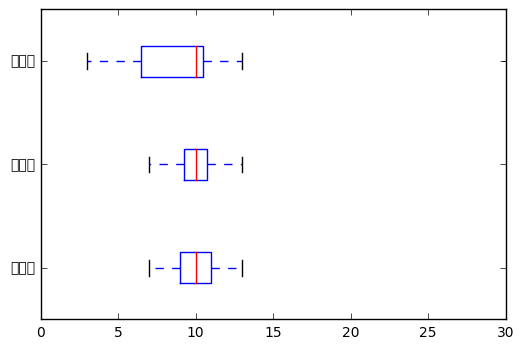

In [52]:
게임당점수.plot(kind='box', vert=False)

In [53]:
# 백분위수
# 상위 10%에 들기 시작하는 값은 얼마인가요?
연봉.quantile(0.9)

연봉    11591.192194
Name: 0.9, dtype: float64

In [54]:
사분하한 = 연봉.quantile(0.25)
사분상한 = 연봉.quantile(0.75)
(사분하한, 사분상한)

(연봉    2310.653026
 Name: 0.25, dtype: float64, 연봉    5924.477478
 Name: 0.75, dtype: float64)

In [55]:
연봉_사분범위 = 연봉[(연봉 > 사분하한) & (연봉 < 사분상한)].dropna()
연봉_사분범위[:3]

,연봉
2,3949.137327
3,4221.651047
5,3152.702054


In [56]:
def 사분범위추출(데이터):
    하한 = 데이터.quantile(0.25)
    상한 = 데이터.quantile(0.75)
    선택 = (데이터 > 하한) & (데이터 < 상한)
    return 데이터[선택].dropna()
사분범위추출 = lambda x : x[(x > x.quantile(0.25)) & (x < x.quantile(0.75))].dropna()
연봉_사분범위 = 사분범위추출(연봉)
(연봉_사분범위.mean(), 연봉_사분범위.median())

(연봉    3709.803362
 dtype: float64, 연봉    3585.611774
 dtype: float64)